In [183]:
from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
#BATCH-SIZE SHOULD BE MINIMU 50 SINCE IT SHOLD DIVISIBLE TO DATA SET ie 50000.
batch_size = 100 
nb_classes = 10# MUST BE 10 (0 TO 9 CLASSES)
nb_epoch = 12# MUST BE TAKEN MINIMUM 10 OHTERWISE CAN'T TRAIN WELL

# input image dimensions
img_rows, img_cols = 32, 32
# the CIFAR10 images are RGB
img_channels = 3
# the data, shuffled and split between train and test sets
#https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py

In [4]:
#CFAR DATA IS LODED AND DATA IS AT LOCAL /TEMP AUTOMATIC DOWNLOADED.
(X_train, y_train), (X_test, y_test) = cifar10.load_data() 
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
Y_train = np_utils.to_categorical(y_train, nb_classes)#DATA IS TRAINED HERRE
Y_test = np_utils.to_categorical(y_test, nb_classes)#DATA IS TESTED

In [6]:
#CONVOLUTION,POOLING,CONVOLUTION, POOLING LAYER IS USED
# IMAGE -CONVOLUTIO- RELU -POOLING WHERE RELU IS ACTIATION FUNCTION
# DENSE = FULL CONNECTION
#DENSE=SOFTMAX
model = Sequential()

model.add(Convolution2D(20, 5, 5, border_mode='same',
                        input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 5, 5, border_mode='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [7]:
#STOCHASTIC NORMALIZATIONS DONE FOR FESSIBILITY OF IMAGE
# DATA IS INITIALIZE
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [8]:
# PIXEL RANGE AND DIVIDED BY 255 TO NORMALIZE
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [25]:
data_augmentation = False
nb_epoch = 10


In [29]:
#DATA IS TRAIN.
model.fit(X_train, Y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, Y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 389s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/10
50000/50000 [==============================] - 389s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
50000/50000 [==============================] - 366s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
50000/50000 [==============================] - 382s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
50000/50000 [==============================] - 424s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
50000/50000 [==============================] - 428s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/10
50000/50000 [==============================] - 468s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/10
50000/50000 [=========

In [30]:
model = Sequential()

model.add(Convolution2D(32, 5, 5, border_mode='same',
                        input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 5, 5, border_mode='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [11]:
model2 = Sequential()

model2.add(Convolution2D(20, 3, 3, border_mode='same',
                        input_shape=X_train.shape[1:]))
model2.add(Activation('relu'))                  

model2.add(Convolution2D(32, 3, 3, border_mode='same'))
model2.add(Activation('relu'))

model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(256))
model2.add(Activation('relu'))

model2.add(Dense(nb_classes))
model2.add(Activation('softmax'))

In [31]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [32]:
model.fit(X_train, Y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, Y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 475s - loss: 1.5546 - acc: 0.4367 - val_loss: 1.2703 - val_acc: 0.5418
Epoch 2/10
50000/50000 [==============================] - 559s - loss: 1.1268 - acc: 0.5995 - val_loss: 1.1192 - val_acc: 0.6069
Epoch 3/10
50000/50000 [==============================] - 511s - loss: 0.9432 - acc: 0.6686 - val_loss: 0.9573 - val_acc: 0.6647
Epoch 4/10
50000/50000 [==============================] - 572s - loss: 0.7985 - acc: 0.7192 - val_loss: 1.0103 - val_acc: 0.6575
Epoch 5/10
50000/50000 [==============================] - 572s - loss: 0.6773 - acc: 0.7620 - val_loss: 1.0054 - val_acc: 0.6737
Epoch 6/10
50000/50000 [==============================] - 515s - loss: 0.5644 - acc: 0.7999 - val_loss: 1.0613 - val_acc: 0.6793
Epoch 7/10
50000/50000 [==============================] - 512s - loss: 0.4645 - acc: 0.8367 - val_loss: 1.1648 - val_acc: 0.6708
Epoch 8/10
50000/50000 [=======================

In [15]:
model2.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [27]:
model2.fit(X_train, Y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, Y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 204s - loss: 0.1432 - acc: 0.9511 - val_loss: 2.0116 - val_acc: 0.6666
Epoch 2/10
50000/50000 [==============================] - 194s - loss: 0.1452 - acc: 0.9515 - val_loss: 2.1528 - val_acc: 0.6645
Epoch 3/10
50000/50000 [==============================] - 238s - loss: 0.1343 - acc: 0.9558 - val_loss: 2.1956 - val_acc: 0.6613
Epoch 4/10
50000/50000 [==============================] - 258s - loss: 0.1244 - acc: 0.9590 - val_loss: 2.2607 - val_acc: 0.6582
Epoch 5/10
50000/50000 [==============================] - 204s - loss: 0.1474 - acc: 0.9522 - val_loss: 2.1367 - val_acc: 0.6707
Epoch 6/10
50000/50000 [==============================] - 216s - loss: 0.1490 - acc: 0.9532 - val_loss: 2.4280 - val_acc: 0.6568
Epoch 7/10
50000/50000 [==============================] - 228s - loss: 0.1384 - acc: 0.9565 - val_loss: 2.3925 - val_acc: 0.6661
Epoch 8/10
50000/50000 [=======================

In [22]:
model2.fit(X_train, Y_train,
              batch_size=batch_size,
              nb_epoch=10,
              validation_data=(X_test, Y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 209s - loss: 0.6064 - acc: 0.7843 - val_loss: 0.9962 - val_acc: 0.6752
Epoch 2/10
50000/50000 [==============================] - 235s - loss: 0.5048 - acc: 0.8216 - val_loss: 1.0050 - val_acc: 0.6898
Epoch 3/10
50000/50000 [==============================] - 213s - loss: 0.4169 - acc: 0.8524 - val_loss: 1.1003 - val_acc: 0.6876
Epoch 4/10
50000/50000 [==============================] - 239s - loss: 0.3396 - acc: 0.8806 - val_loss: 1.2852 - val_acc: 0.6792
Epoch 5/10
50000/50000 [==============================] - 213s - loss: 0.2847 - acc: 0.8999 - val_loss: 1.3411 - val_acc: 0.6798
Epoch 6/10
50000/50000 [==============================] - 213s - loss: 0.2499 - acc: 0.9121 - val_loss: 1.4876 - val_acc: 0.6714
Epoch 7/10
50000/50000 [==============================] - 271s - loss: 0.2086 - acc: 0.9277 - val_loss: 1.6053 - val_acc: 0.6765
Epoch 8/10
50000/50000 [=======================

In [18]:
model3 = Sequential()

model3.add(Convolution2D(32, 3, 3, border_mode='same',
                        input_shape=X_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Convolution2D(32, 2, 2, border_mode='same'))
model3.add(Activation('relu'))

model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Convolution2D(32, 2, 2, border_mode='same'))
model3.add(Activation('relu'))

model3.add(Flatten())
model3.add(Dense(256))
model3.add(Activation('relu'))

model3.add(Dense(nb_classes))
model3.add(Activation('softmax'))

In [19]:
model3.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [21]:
model3.fit(X_train, Y_train,
              batch_size=batch_size,
              nb_epoch=10,
              validation_data=(X_test, Y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 240s - loss: 0.9657 - acc: 0.6590 - val_loss: 1.2695 - val_acc: 0.5811
Epoch 2/10
50000/50000 [==============================] - 290s - loss: 0.8744 - acc: 0.6945 - val_loss: 1.2753 - val_acc: 0.5914
Epoch 3/10
50000/50000 [==============================] - 236s - loss: 0.8014 - acc: 0.7189 - val_loss: 1.3494 - val_acc: 0.5939
Epoch 4/10
50000/50000 [==============================] - 237s - loss: 0.7326 - acc: 0.7440 - val_loss: 1.4457 - val_acc: 0.5814
Epoch 5/10
50000/50000 [==============================] - 279s - loss: 0.6870 - acc: 0.7595 - val_loss: 1.4966 - val_acc: 0.5687
Epoch 6/10
50000/50000 [==============================] - 327s - loss: 0.6568 - acc: 0.7721 - val_loss: 1.5546 - val_acc: 0.5821
Epoch 7/10
50000/50000 [==============================] - 325s - loss: 0.6035 - acc: 0.7933 - val_loss: 1.6869 - val_acc: 0.5620
Epoch 8/10
50000/50000 [=======================

In [34]:
from keras.models import model_from_json

In [35]:
model1_json=model.to_json()

In [37]:
with open("model.json", "w") as json_file:
    json_file.write(model1_json)

In [39]:
model.save_weights("model.h5")

In [40]:
model2.save_weights("model2.h5")

In [41]:
model3.save_weights("model3.h5")

In [56]:
(X_trainImage, y_trainImage), (X_testImage, y_testImage) = cifar10.load_data()
print('X_train shape:', X_trainImage.shape)
print(X_trainImage.shape[0], 'train samples')
print(X_trainImage.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
50000 test samples


In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
def displayImage(image):
    img=np.ascontiguousarray(image.transpose(0, 1, 2))
    img=Image.fromarray(img, 'RGB')
    plt.imshow(img)
    plt.show()

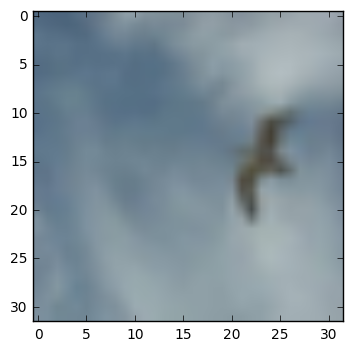

In [184]:
displayImage(X_trainImage[303])

In [144]:
predictions1=model.predict(X_test)

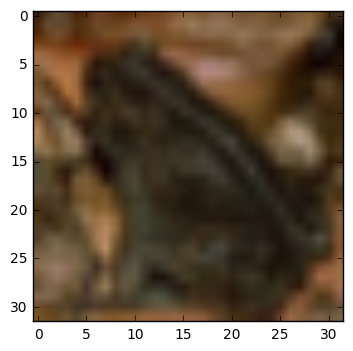

In [71]:
displayImage(X_testImage[30])

In [185]:
predictions1[303]

array([  6.68677876e-06,   1.00723241e-07,   9.99611199e-01,
         1.37781317e-04,   7.84223266e-06,   2.33742001e-04,
         6.18414688e-08,   1.69779162e-06,   7.83726421e-07,
         1.48234482e-08], dtype=float32)

In [182]:
predictions1.shape

(10000, 10)

In [ ]:
#Load model
json_file=open("model.json", "r")
loaded_model_json=json_file.read()
json_file.close()

loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
